### Compute dSPM inverse solution on MNE evoked dataset in a volume source space and stores the solution in a nifti file for visualisation.
- Compute dSPM inverse solution on MNE evoked dataset in a volume source space and stores the solution in a nifti file for visualisation.

In [3]:
import matplotlib.pyplot as plt

from nilearn.plotting import plot_stat_map
from nilearn.image import index_img

from mne.datasets import sample
from mne import read_evokeds
from mne.minimum_norm import apply_inverse,read_inverse_operator


In [4]:
data_path = sample.data_path()
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-vol-7-meg-inv.fif'
fname_evoked = data_path + '/MEG/sample/sample_audvis-ave.fif'

In [5]:
snr = 3.0
lambda2 = 1.0 / snr ** 2
method = "dSPM"  # use dSPM method (could also be MNE or sLORETA)

In [6]:
# Load data
evoked = read_evokeds(fname_evoked,condition=0,baseline=(None,0))
inverse_operator = read_inverse_operator(fname_inv)
src = inverse_operator['src']

Reading /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
Reading inverse operator decomposition from /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-vol-7-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG 

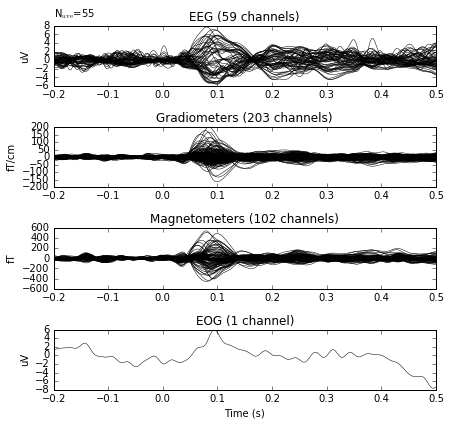

In [14]:
evoked.plot();

In [7]:
evoked

<Evoked  |  'Left Auditory' (mean, N=55), [-0.1998, 0.49949] sec, 376 ch, ~4.9 MB>

In [8]:
inverse_operator

<InverseOperator | MEG channels: 305 | EEG channels: 0 | Source space: volume with 3757 sources | Source orientation: Free>

In [16]:
src

<SourceSpaces: [<volume, shape=(21, 26, 24), n_used=3757, coordinate_frame=head>]>

In [38]:
# compute inverse solution
stc = apply_inverse(evoked,inverse_operator,lambda2,method)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "Left Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  59.7% variance
    Combining the current components...
    dSPM...
[done]


In [12]:
# SourceEstimate
# https://martinos.org/mne/stable/generated/mne.SourceEstimate.html
stc

<VolSourceEstimate  |  3757 vertices, tmin : -199.795213158 (ms), tmax : 499.488032896 (ms), tstep : 1.66496010965 (ms), data size : 3757 x 421>

In [17]:
stc.crop(0.0,0.2)

<VolSourceEstimate  |  3757 vertices, tmin : 2.77555756156e-14 (ms), tmax : 199.795213158 (ms), tstep : 1.66496010965 (ms), data size : 3757 x 121>

In [27]:
stc

<VolSourceEstimate  |  3757 vertices, tmin : 2.77555756156e-14 (ms), tmax : 199.795213158 (ms), tstep : 1.66496010965 (ms), data size : 3757 x 121>

In [19]:
# Export result as a 4D nifti object
img = stc.as_volume(src,mri_resolution=False) # set True for full MRI resolution

In [ ]:
# Save it as a nifti file
# nib.save(img,'mne_%s_inverse.nii.gz'%method)

In [20]:
img

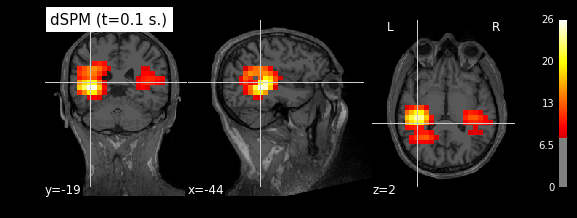

In [21]:
t1_fname = data_path + '/subjects/sample/mri/T1.mgz'

# Plotting with nilearn ######################################################
plot_stat_map(index_img(img, 61), t1_fname, threshold=8.,
              title='%s (t=%.1f s.)' % (method, stc.times[61]))
plt.show();

In [23]:
img.shape

(21, 26, 24, 121)

In [24]:
index_img(img, 61).shape

(21, 26, 24)

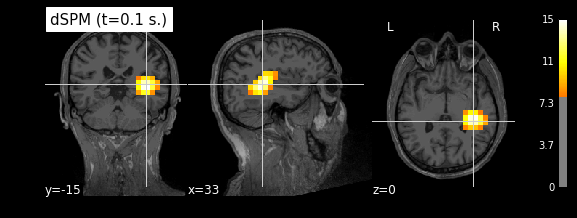

In [26]:
# Plotting with nilearn ######################################################
plot_stat_map(index_img(img, 40), t1_fname, threshold=8.,
              title='%s (t=%.1f s.)' % (method, stc.times[61]))
plt.show();